In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_resposta = pd.DataFrame()

In [3]:
features = list(df_test)

In [4]:
features.append('NU_NOTA_MT')

In [5]:
df_resposta['NU_INSCRICAO'] = df_test['NU_INSCRICAO']

In [6]:
df_train = df_train[features]

In [7]:
df_train.head(10)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,520.0,D,D,C,A,A,C,H,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,580.0,A,A,B,A,A,A,NaN,A,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,...,NaN,D,D,C,A,A,A,NaN,A,NaN
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,...,NaN,H,E,E,C,B,C,F,D,NaN
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,...,NaN,E,D,C,A,A,B,F,A,NaN
5,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,29,BA,18,F,1,1,1,1,1,...,620.0,E,E,C,B,B,A,NaN,A,364.5
6,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,51,MT,18,F,3,1,2,0,2,...,560.0,E,D,C,B,B,C,E,A,529.2
7,2eb189d4912f64b19d1967e8e84b6141aba18770,43,RS,18,F,1,1,1,1,1,...,620.0,G,F,L,B,B,A,NaN,D,566.7
8,5822cb43e0800429be2084b3f86a63aaa73fa66c,26,PE,16,F,3,1,2,0,2,...,680.0,H,E,B,A,B,A,NaN,A,372.4
9,94f7e277f87cd58e10a45da4ad5dd168651cf3ef,31,MG,24,M,4,2,4,0,1,...,NaN,H,E,G,B,B,B,H,A,NaN


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 78 columns):
CO_UF_RESIDENCIA     13730 non-null int64
NU_IDADE             13730 non-null int64
TP_SEXO              13730 non-null int64
TP_COR_RACA          13730 non-null int64
TP_NACIONALIDADE     13730 non-null int64
TP_ST_CONCLUSAO      13730 non-null int64
TP_ANO_CONCLUIU      13730 non-null int64
TP_ESCOLA            13730 non-null int64
IN_TREINEIRO         13730 non-null int64
IN_BAIXA_VISAO       13730 non-null int64
IN_CEGUEIRA          13730 non-null int64
IN_SURDEZ            13730 non-null int64
IN_DISLEXIA          13730 non-null int64
IN_DISCALCULIA       13730 non-null int64
IN_SABATISTA         13730 non-null int64
IN_GESTANTE          13730 non-null int64
IN_IDOSO             13730 non-null int64
TP_PRESENCA_CN       13730 non-null int64
TP_PRESENCA_LC       13730 non-null int64
NU_NOTA_CN           13730 non-null float64
NU_NOTA_CH           13730 non-null float64
NU_NO

In [9]:
df_train.drop(['NU_INSCRICAO', 'SG_UF_RESIDENCIA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_PRESENCA_CH', 'Q027', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT'], 1, inplace=True)

df_test.drop(['NU_INSCRICAO', 'SG_UF_RESIDENCIA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_PRESENCA_CH', 'Q027', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT'], 1, inplace=True)

In [10]:
df_train['TP_SEXO'].replace('M', 0, inplace=True)
df_train['TP_SEXO'].replace('F', 1, inplace=True)

df_test['TP_SEXO'].replace('M', 0, inplace=True)
df_test['TP_SEXO'].replace('F', 1, inplace=True)

In [11]:
# Coloquei as notas como zero pq acredito que representam a nota dos alunos que faltaram.

df_train['NU_NOTA_CN'].fillna(0, inplace=True)
df_train['NU_NOTA_CH'].fillna(0, inplace=True)
df_train['NU_NOTA_LC'].fillna(0, inplace=True)
df_train['NU_NOTA_MT'].fillna(0, inplace=True)
df_train['NU_NOTA_COMP1'].fillna(0, inplace=True)
df_train['NU_NOTA_COMP2'].fillna(0, inplace=True)
df_train['NU_NOTA_COMP3'].fillna(0, inplace=True)
df_train['NU_NOTA_COMP4'].fillna(0, inplace=True)
df_train['NU_NOTA_COMP5'].fillna(0, inplace=True)
df_train['NU_NOTA_REDACAO'].fillna(0, inplace=True)

df_test['NU_NOTA_CN'].fillna(0, inplace=True)
df_test['NU_NOTA_CH'].fillna(0, inplace=True)
df_test['NU_NOTA_LC'].fillna(0, inplace=True)
df_test['NU_NOTA_COMP1'].fillna(0, inplace=True)
df_test['NU_NOTA_COMP2'].fillna(0, inplace=True)
df_test['NU_NOTA_COMP3'].fillna(0, inplace=True)
df_test['NU_NOTA_COMP4'].fillna(0, inplace=True)
df_test['NU_NOTA_COMP5'].fillna(0, inplace=True)
df_test['NU_NOTA_REDACAO'].fillna(0, inplace=True)

# Coloquei como 8 pq acredito que represente uma situação neutra

df_train['TP_STATUS_REDACAO'].fillna(8, inplace=True)

df_test['TP_STATUS_REDACAO'].fillna(8, inplace=True)

In [12]:
df_train = pd.get_dummies(df_train, prefix='Q', columns=['Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047'])

df_test = pd.get_dummies(df_test, prefix='Q', columns=['Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047'])

In [15]:
ft = list(df_train)
del ft[-1]
ft.append('NU_NOTA_MT')

df_train[ft].corr()

,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,...,Q_C,Q_C,Q_C,Q_C,Q_D,Q_D,Q_D,Q_D,Q_D,NU_NOTA_MT
CO_UF_RESIDENCIA,1.000000,-0.002017,0.020321,-0.234786,0.009433,0.025822,-0.032538,0.041406,-0.034944,0.001360,...,0.022630,0.081697,0.121325,0.014886,0.029650,0.025330,0.063709,0.060282,0.057804,0.002613
NU_IDADE,-0.002017,1.000000,0.000978,0.009675,-0.017713,-0.253403,0.681435,-0.296328,-0.295091,0.027907,...,0.054228,-0.039226,0.296697,0.027465,-0.043968,-0.035452,0.019519,-0.037770,-0.101789,-0.240874
TP_SEXO,0.020321,0.000978,1.000000,-0.015387,-0.051523,-0.027854,0.023946,-0.011234,0.026916,-0.006452,...,0.021163,-0.036988,-0.051844,-0.005811,0.000120,-0.012615,-0.004511,-0.020363,-0.015778,-0.061068
TP_COR_RACA,-0.234786,0.009675,-0.015387,1.000000,0.015761,0.000738,0.003942,-0.041713,0.009676,-0.014715,...,0.034242,-0.103447,-0.022569,-0.016792,-0.013224,-0.015866,-0.014893,-0.067862,-0.151271,-0.070239
TP_NACIONALIDADE,0.009433,-0.017713,-0.051523,0.015761,1.000000,-0.000054,-0.026154,0.024070,-0.015179,0.009354,...,0.008324,-0.018843,0.004146,0.010638,-0.005670,0.012706,0.000909,-0.003925,-0.024483,-0.033130
TP_ST_CONCLUSAO,0.025822,-0.253403,-0.027854,0.000738,-0.000054,1.000000,-0.592834,0.156222,0.533983,0.018096,...,-0.027293,-0.000683,-0.172526,-0.028944,0.032034,0.019988,-0.032787,0.000536,0.020986,0.023736
TP_ANO_CONCLUIU,-0.032538,0.681435,0.023946,0.003942,-0.026154,-0.592834,1.000000,-0.422308,-0.257710,-0.000956,...,0.049119,-0.016068,0.324344,0.038224,-0.035470,-0.026093,0.044572,-0.015173,-0.061833,-0.191553
TP_ESCOLA,0.041406,-0.296328,-0.011234,-0.041713,0.024070,0.156222,-0.422308,1.000000,-0.244562,-0.007455,...,-0.047925,0.050562,-0.162019,0.010541,-0.006940,-0.004874,-0.021086,0.034507,0.191906,0.189084
IN_TREINEIRO,-0.034944,-0.295091,0.026916,0.009676,-0.015179,0.533983,-0.257710,-0.244562,1.000000,-0.013602,...,-0.043599,0.018433,-0.161568,-0.022147,0.022150,0.007549,-0.030399,0.019724,0.074933,0.078804
IN_BAIXA_VISAO,0.001360,0.027907,-0.006452,-0.014715,0.009354,0.018096,-0.000956,-0.007455,-0.013602,1.000000,...,-0.016460,0.016444,-0.013633,-0.003847,-0.007145,-0.003343,-0.012950,0.028496,0.004058,-0.006546


IndexError: Inconsistent shape between the condition and the input (got (78, 1) and (78,))

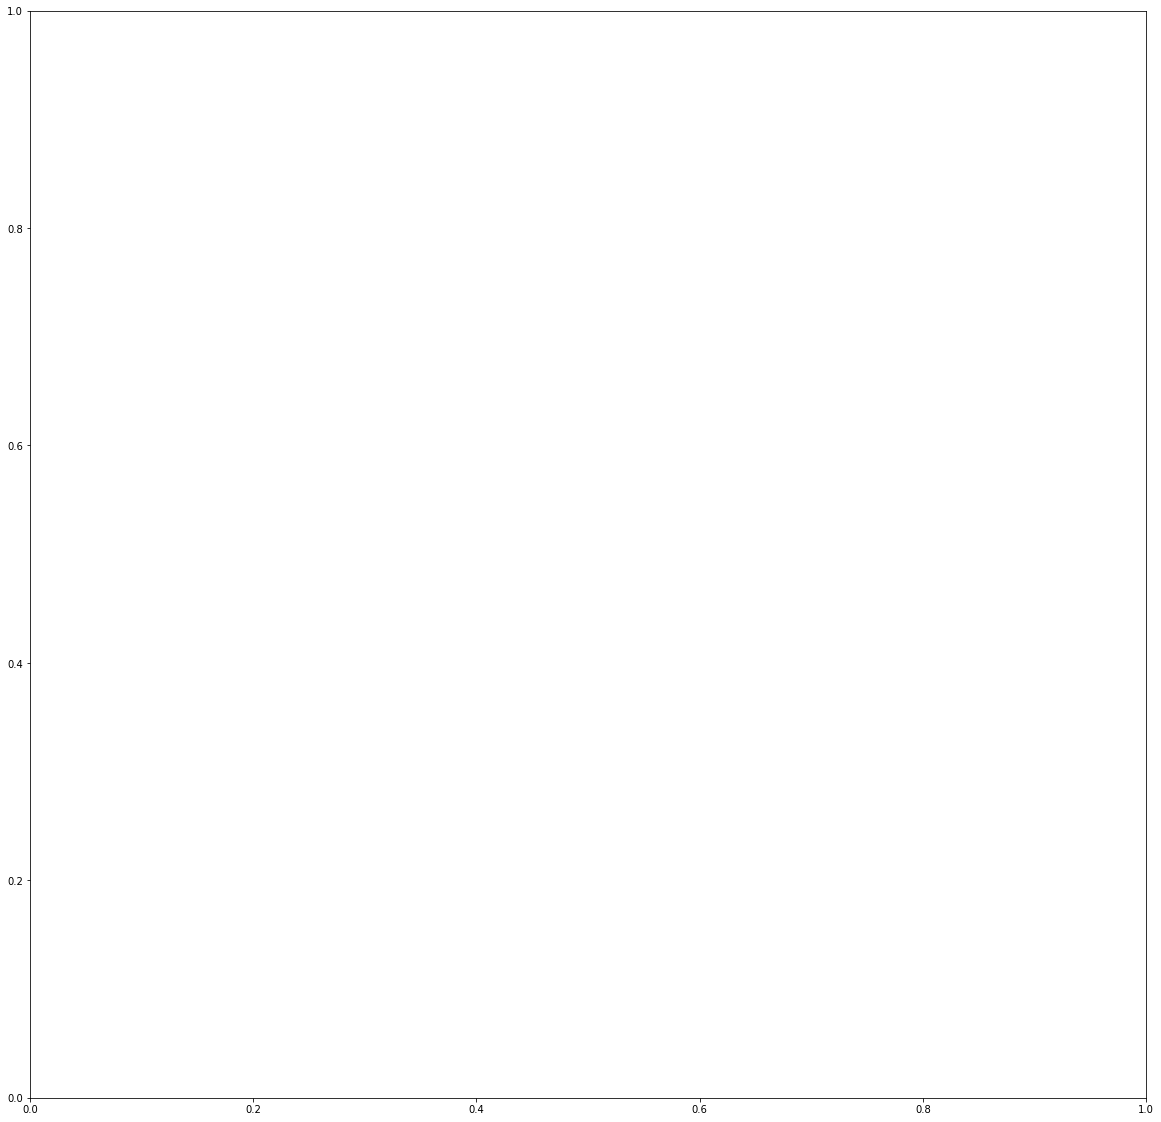

In [23]:
plt.subplots(figsize=(20,20))

top_corr_features = df_train.corr().index
sns.heatmap(top_corr_features,cmap='coolwarm')
plt.title('df_train.corr()')

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

label = df_train['NU_NOTA_MT'].values

df_train.drop(['NU_NOTA_MT'], axis=1, inplace=True)

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(df_train,label)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

KeyError: 'NU_NOTA_MT'